-------------------------------------Real-World Problem---------------------------------------

Accurately predicting house prices is a critical task in the real estate industry. Buyers, sellers, and property investors rely on price estimation to make informed financial decisions. Incorrect pricing can lead to financial losses, delayed sales, or undervaluation of property assets.

The objective of this project is to develop a machine learning model that can estimate the sale price of a house based on its structural and property-related features.

---------------------------------Input and Output of the Model--------------------------------
-----Input (Features)

The model uses selected numerical features that influence house prices:
--OverallQual – Overall material and finish quality
--GrLivArea – Above ground living area (square feet)
--GarageCars – Size of garage (car capacity)
--TotalBsmtSF – Total basement area (square feet)
--FullBath – Number of full bathrooms
--YearBuilt – Year the house was built
--LotArea – Lot size (square feet)

-----Output (Target Variable)
--SalePrice – The final sale price of the house (in dollars)

Dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("dataset/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.shape
df.info()
df["SalePrice"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
features = [
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotalBsmtSF',
    'FullBath',
    'YearBuilt',
    'LotArea'
]

X = df[features]
y = df['SalePrice'] # picking all reqiured features

In [14]:
X.isnull().sum() #checking null value

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
LotArea        0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test) # LinearRegression model

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)  # RandomForestRegressor model

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [20]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr) # # Regression does not use: Accuracy, Confusion matrix

Linear Regression Results:
MAE: 24788.522272540522
RMSE: 39583.54630308417
R2 Score: 0.7957248367793983


In [21]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Results:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf) 


Random Forest Results:
MAE: 18525.8176679713
RMSE: 28659.572588834355
R2 Score: 0.8929157536735481


In [22]:
import pandas as pd
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})
results

,Model,MAE,RMSE,R2 Score
0,Linear Regression,24788.522273,39583.546303,0.795725
1,Random Forest,18525.817668,28659.572589,0.892916


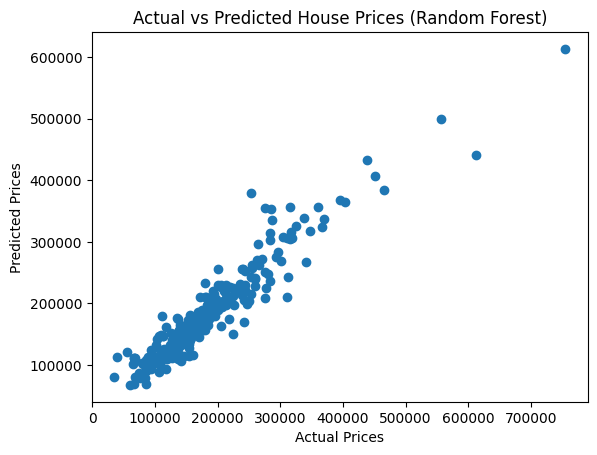

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.show()